Jose Burgos (BX7FN1)

# Problem 1
The 50 most popular sweets of last year were examined. The sales volume of sweets (in tons), the size of the sweets (in grams) and the sweetness factor (EF) of the sweets can be found in file 3assign1.csv

In [1]:
# Read the data from the CSV file
data <- read.csv("3assign1.csv")
# Display the first few rows of the dataset
head(data)

,Number,Sales,Size,Sweetness.factor
,<int>,<int>,<int>,<dbl>
1,1,677,150,8.1
2,2,315,133,8.3
3,3,106,107,8.0
4,4,322,129,8.1
5,5,368,133,7.9
6,6,232,101,8.4


We wish to give a linear regression model, in which the response variable is the sales volume, while the explanatory
variables are the size of the sweets and the sweetness factor.

## Task 1
Estimate and interpret the parameters of the linear regression, test whether the explanatory variables are significant (at significance level 5%).

In [2]:
# Fit the linear regression model
model <- lm(Sales ~ Size + Sweetness.factor, data = data)

# Display a summary of the regression results
summary(model)


Call:
lm(formula = Sales ~ Size + Sweetness.factor, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-133.342  -42.588    5.825   35.758  179.574 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -1184.1198   318.6501  -3.716 0.000537 ***
Size                 7.3332     0.5745  12.764  < 2e-16 ***
Sweetness.factor    79.1741    39.8899   1.985 0.053019 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 79.41 on 47 degrees of freedom
Multiple R-squared:  0.7942,	Adjusted R-squared:  0.7855 
F-statistic:  90.7 on 2 and 47 DF,  p-value: < 2.2e-16


The p-values for the intercept and Size are highly significant (p < 0.05), indicating strong evidence that they have a significant effect on Sales. Sweetness.factor is marginally significant (p = 0.053019), suggesting that it might have an effect, but the evidence is not as strong.

## Task 2
Define and interpret the multivariate coefficient of determination.

In [3]:
# Extract the multiple R-squared value
multivariate_r_squared <- summary(model)$r.squared

# Display the multivariate R-squared value
cat("Multivariate R-squared:", multivariate_r_squared, "\n")


Multivariate R-squared: 0.7942217 


The Multiple R-squared value of 0.7942 suggests that approximately 79.42% of the variability in Sales is explained by the Size and Sweetness.factor in the model

## Task 3
Test the reliability of the regression model at significance level 5% .


In [4]:
# Perform ANOVA test on the linear regression model
anova_result <- anova(model)

# Display the ANOVA table
print(anova_result)

Analysis of Variance Table

Response: Sales
                 Df  Sum Sq Mean Sq  F value  Pr(>F)    
Size              1 1119110 1119110 177.4617 < 2e-16 ***
Sweetness.factor  1   24843   24843   3.9395 0.05302 .  
Residuals        47  296392    6306                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [5]:
# Extract the p-value for the overall model significance
p_value_model <- anova_result$"Pr(>F)"[1]

# Display the p-value for the overall model significance
cat("P-value for Overall Model Significance:", p_value_model, "\n")

# Test for significance at a 5% level
if (p_value_model < 0.05) {
  cat("The overall regression model is statistically significant at the 5% level.\n")
} else {
  cat("The overall regression model is not statistically significant at the 5% level.\n")
}

P-value for Overall Model Significance: 1.42804e-17 
The overall regression model is statistically significant at the 5% level.


The regression model is reliable and statistically significant at the 5% significance level, based on the F-statistic and associated p-value. This indicates that at least one of the predictor variables (Size or Sweetness.factor) has a significant effect on Sales.


## Task 4
Give an interval estimate for the parameters with 95% confidence level.

In [6]:
# Obtain 95% confidence intervals for the parameters
conf_intervals <- confint(model)

# Display the confidence intervals
print(conf_intervals)


                        2.5 %      97.5 %
(Intercept)      -1825.161028 -543.078535
Size                 6.177449    8.488964
Sweetness.factor    -1.073987  159.422245


In [7]:
# Display the interpretation of confidence intervals
for (i in 1:nrow(conf_intervals)) {
  cat("95% Confidence Interval for", rownames(conf_intervals)[i], ":",
      conf_intervals[i, 1], "to", conf_intervals[i, 2], "\n")
}

95% Confidence Interval for (Intercept) : -1825.161 to -543.0785 
95% Confidence Interval for Size : 6.177449 to 8.488964 
95% Confidence Interval for Sweetness.factor : -1.073987 to 159.4222 


## Task 5
Give an estimation for the expected sales volume of next year’s most popular sweets if it is 130gr and has sweetness factor of 8.5. Also, give a 95% confidence interval estimate for that.

In [8]:
# Define a new data frame with the predictor values for prediction
new_data <- data.frame(Size = 130, Sweetness.factor = 8.5)

# Use the predict() function to estimate the expected sales volume
predicted_sales <- predict(model, newdata = new_data, interval = "confidence")

# Display the point estimate
cat("Estimated Sales Volume:", predicted_sales[1], "tons\n")

# Display the 95% confidence interval
cat("95% Confidence Interval for Sales Volume:",
    predicted_sales[1, "lwr"], "to", predicted_sales[1, "upr"], "tons\n")

Estimated Sales Volume: 442.1771 tons
95% Confidence Interval for Sales Volume: 403.4041 to 480.9501 tons


# Problem 2
File 3assign2.csv contains the sweetness factor of sweets of different categories.

In [18]:
# Load the new dataset
data2 <- read.csv("3assign2.csv")

# Display the first few rows of the dataset
head(data)

,Number,Sales,Size,Sweetness.factor
,<int>,<int>,<int>,<dbl>
1,1,677,150,8.1
2,2,315,133,8.3
3,3,106,107,8.0
4,4,322,129,8.1
5,5,368,133,7.9
6,6,232,101,8.4


# Task
Is it acceptable that the difference between the sweetness factor of sweets belonging to different categories is negligible or 0, or can a significant difference be shown at significance level ε = 0.05 ?

In [10]:
# Conduct ANOVA test
anova_result <- aov(data2$Chocolate ~ data2$Gummy.candy + data2$Cake + data2$Icecream)

# Display ANOVA table
summary(anova_result)

                  Df Sum Sq Mean Sq F value   Pr(>F)    
data2$Gummy.candy  1  1.381   1.381   2.403    0.128    
data2$Cake         1  0.024   0.024   0.042    0.838    
data2$Icecream     1 12.091  12.091  21.036 3.73e-05 ***
Residuals         44 25.290   0.575                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [11]:
anova_result

Call:
   aov(formula = data2$Chocolate ~ data2$Gummy.candy + data2$Cake + 
    data2$Icecream)

Terms:
                data2$Gummy.candy data2$Cake data2$Icecream Residuals
Sum of Squares           1.381253   0.024385      12.090966 25.290063
Deg. of Freedom                 1          1              1        44

Residual standard error: 0.7581386
Estimated effects may be unbalanced

*   Gummy Candy: 0.128 > 0.05 (not statistically significant)
*   Cake: 0.838 > 0.05 (not statistically significant)
*   Ice Cream: 3.73e-05 < 0.05 (statistically significant)

There is a significant difference in sweetness factor among the categories, with Ice Cream being the factor that contributes significantly to the observed differences. The other factors (Gummy Candy and Cake) do not show statistically significant differences in sweetness factor at the 0.05 significance level.








# Problem 3
File 3assign3.csv shows the sales data of an imaginary confectionary by month.

In [ ]:
install.packages("zoo")
install.packages("ggplot2")
install.packages("forecast")
library(ggplot2)
library(forecast)
library(zoo)

# Load the new dataset
data3 <- read.csv("3assign3.csv")

## Task 1
Make a time series diagram based on the data, then calculate the empirical autocorrelation and partial autocorrelation functions

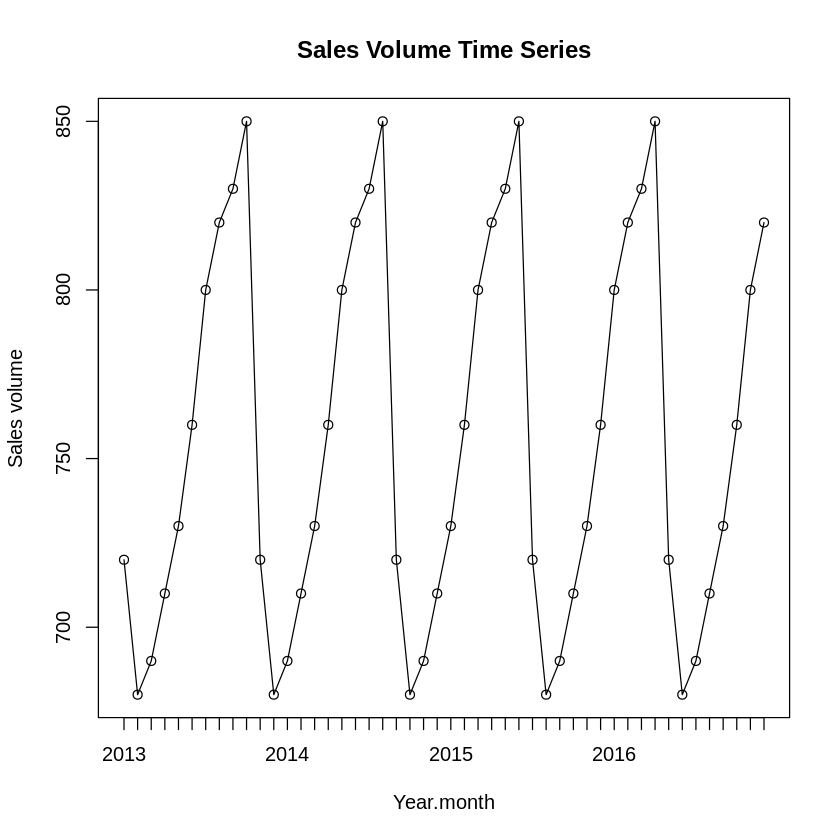

In [22]:
# Convert 'Year-month' to a Date type
data3$Year.month <- as.yearmon(data3$Year.month)

# Plotting the time series diagram
plot(data3$Year.month, data3$Sales.volume, type = "o",
     main = "Sales Volume Time Series",
     xlab = "Year.month",
     ylab = "Sales volume")

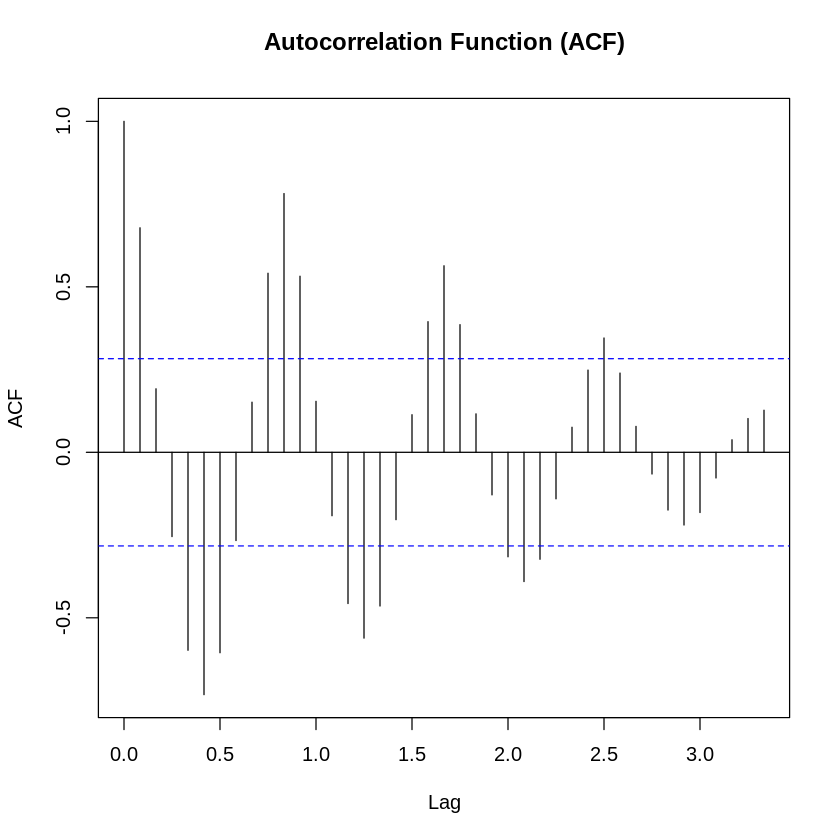

In [14]:
# Converting the data to a time series object
ts_data <- ts(data3$Sales.volume, frequency = 12, start = c(2013, 1))

# Plotting the autocorrelation function (ACF)
acf(ts_data, lag.max = 40, main = "Autocorrelation Function (ACF)")

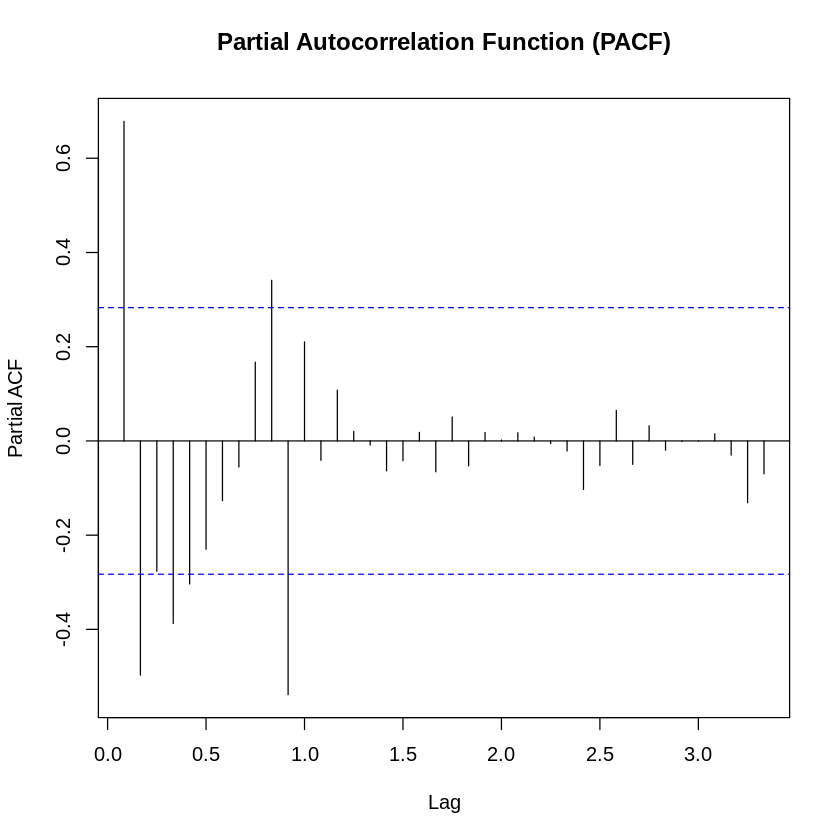

In [15]:
# Plotting the partial autocorrelation function (PACF)
pacf(ts_data, lag.max = 40, main = "Partial Autocorrelation Function (PACF)")

### Task 2
Experiment with transforming the data and filtering out the trend and seasonal components to fit different time series models. Perform fit (relevance) testing.

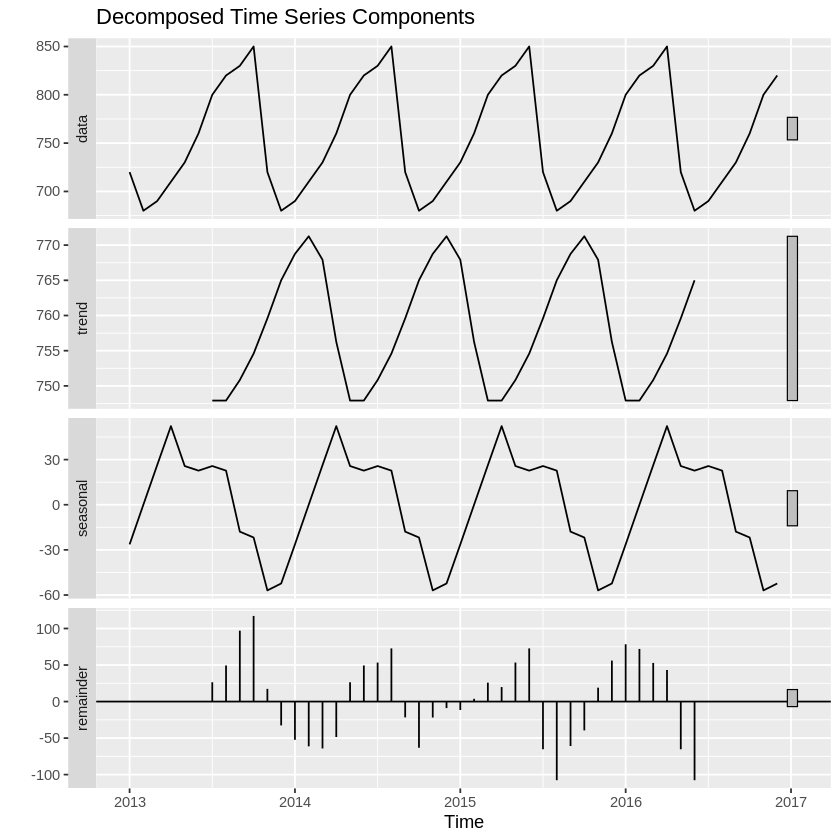

In [23]:
# Decompose the time series into trend, seasonal, and remainder components
decomposed <- decompose(ts_data)

# Plotting the decomposed components
autoplot(decomposed) +
  labs(title = "Decomposed Time Series Components")

In [24]:
# Fit a time series model
model <- auto.arima(ts_data)

# Summary of the fitted model
summary(model)

Series: ts_data 
ARIMA(5,0,0)(1,0,0)[12] with non-zero mean 

Coefficients:
         ar1     ar2      ar3      ar4      ar5     sar1      mean
      0.3611  0.1344  -0.1740  -0.2876  -0.3398  -0.5818  758.1300
s.e.  0.1557  0.1745   0.1367   0.1546   0.1351   0.1656    2.0378

sigma^2 = 721.4:  log likelihood = -226.64
AIC=469.27   AICc=472.97   BIC=484.24

Training set error measures:
                    ME    RMSE      MAE       MPE     MAPE      MASE       ACF1
Training set -1.528585 24.8229 19.14661 -0.309111 2.505312 0.3220926 -0.1322183

In [28]:
# Fit an ETS model
ets_model <- ets(ts_data)

# Print the model summary
summary(ets_model)

ETS(M,N,N) 

Call:
 ets(y = ts_data) 

  Smoothing parameters:
    alpha = 0.9999 

  Initial states:
    l = 717.8066 

  sigma:  0.0565

     AIC     AICc      BIC 
549.5415 550.0870 555.1551 

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE      ACF1
Training set 2.129201 44.86322 32.13104 0.1013105 4.336333 0.5405221 0.2671032

## Task 3
Make a prediction for the expected sales volume in the next months

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2017       815.7723 781.3518 850.1928 763.1307 868.4139
Feb 2017       786.3164 749.7201 822.9127 730.3471 842.2856
Mar 2017       741.1073 703.3929 778.8216 683.4281 798.7864
Apr 2017       681.2208 643.4925 718.9491 623.5203 738.9212
May 2017       719.0258 679.6678 758.3839 658.8329 779.2188
Jun 2017       727.6604 683.0302 772.2906 659.4044 795.9164
Jul 2017       737.2545 689.9191 784.5899 664.8613 809.6477
Aug 2017       763.0621 714.8070 811.3172 689.2623 836.8619
Sep 2017       796.8410 748.5550 845.1270 722.9939 870.6880
Oct 2017       815.2016 765.4543 864.9489 739.1197 891.2835
Nov 2017       804.9946 752.1342 857.8551 724.1515 885.8377
Dec 2017       778.9831 723.8063 834.1598 694.5975 863.3686
Jan 2018       745.9904 689.6680 802.3128 659.8527 832.1281
Feb 2018       720.3861 663.3342 777.4381 633.1327 807.6396
Mar 2018       713.0615 653.5978 772.5252 622.1196 804.0034
Apr 2018       735.8773 674.3160 797.438

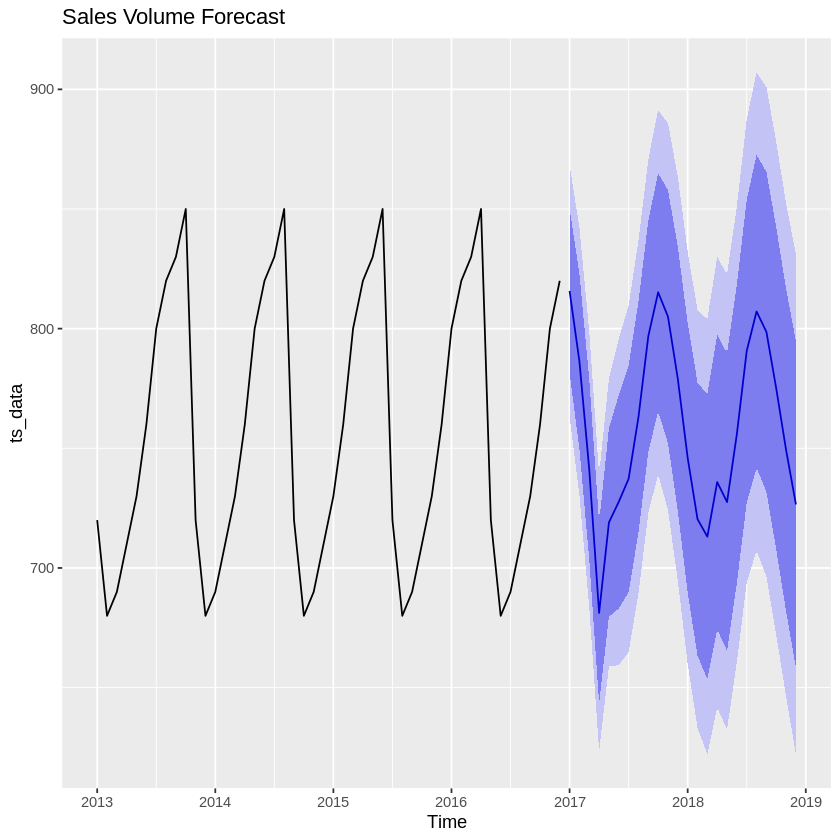

In [19]:
# Plotting the forecast
forecast_plot <- autoplot(forecast(model, h = 24)) +
  labs(title = "Sales Volume Forecast")
print(forecast_plot)

# Print the forecast
print(forecast(model, h = 24))

         Point Forecast    Lo 80     Hi 80    Lo 95     Hi 95
Jan 2017        819.998 760.6725  879.3235 729.2675  910.7285
Feb 2017        819.998 736.0365  903.9595 691.5900  948.4060
Mar 2017        819.998 717.0864  922.9096 662.6083  977.3877
Apr 2017        819.998 701.0722  938.9238 638.1167 1001.8793
May 2017        819.998 686.9295  953.0665 616.4873 1023.5087
Jun 2017        819.998 674.1130  965.8830 596.8861 1043.1099
Jul 2017        819.998 662.2987  977.6973 578.8178 1061.1782
Aug 2017        819.998 651.2760  988.7200 561.9600 1078.0360
Sep 2017        819.998 640.8985  999.0975 546.0890 1093.9070
Oct 2017        819.998 631.0598 1008.9362 531.0420 1108.9540
Nov 2017        819.998 621.6796 1018.3164 516.6962 1123.2998
Dec 2017        819.998 612.6955 1027.3004 502.9562 1137.0397
Jan 2018        819.998 604.0581 1035.9379 489.7464 1150.2496
Feb 2018        819.998 595.7271 1044.2689 477.0053 1162.9907
Mar 2018        819.998 587.6696 1052.3264 464.6823 1175.3137
Apr 2018

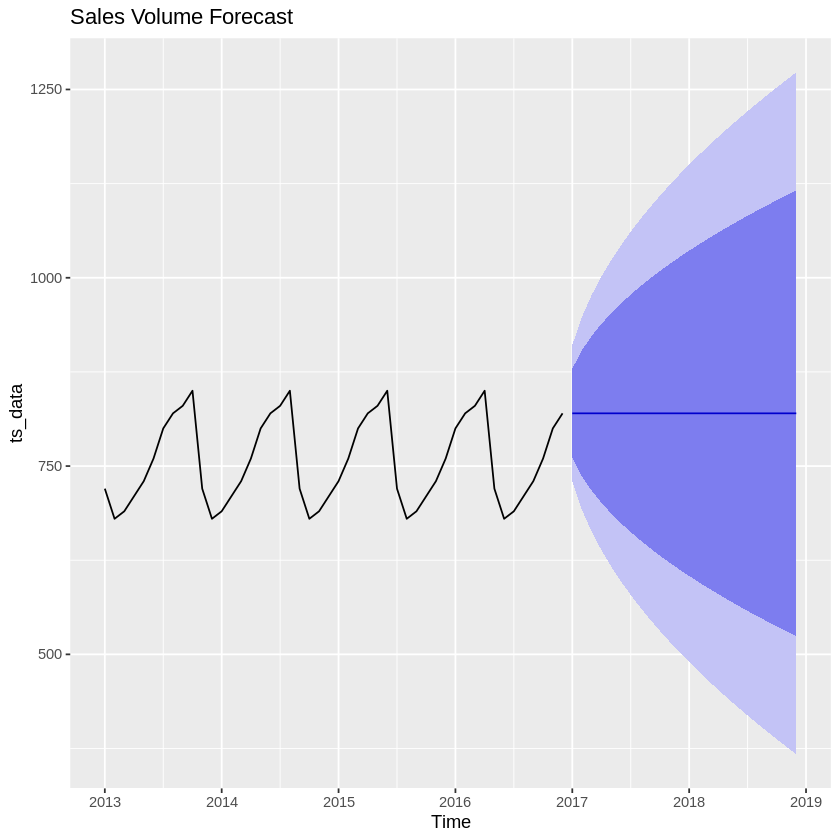

In [30]:
# Plotting the forecast
forecast_plot <- autoplot(forecast(ets_model, h = 24)) +
  labs(title = "Sales Volume Forecast")
print(forecast_plot)

# Print the forecast
print(forecast(ets_model, h = 24))